In [ ]:
시리얼 통신을 사용한 화면 만들기
현장에서는 조금만거 하는데 하기 여러개깔기 힘듬

누구나 쉽게 아두이노로 화면구현을 할 수 있음
아두이노와 잘 호환됨

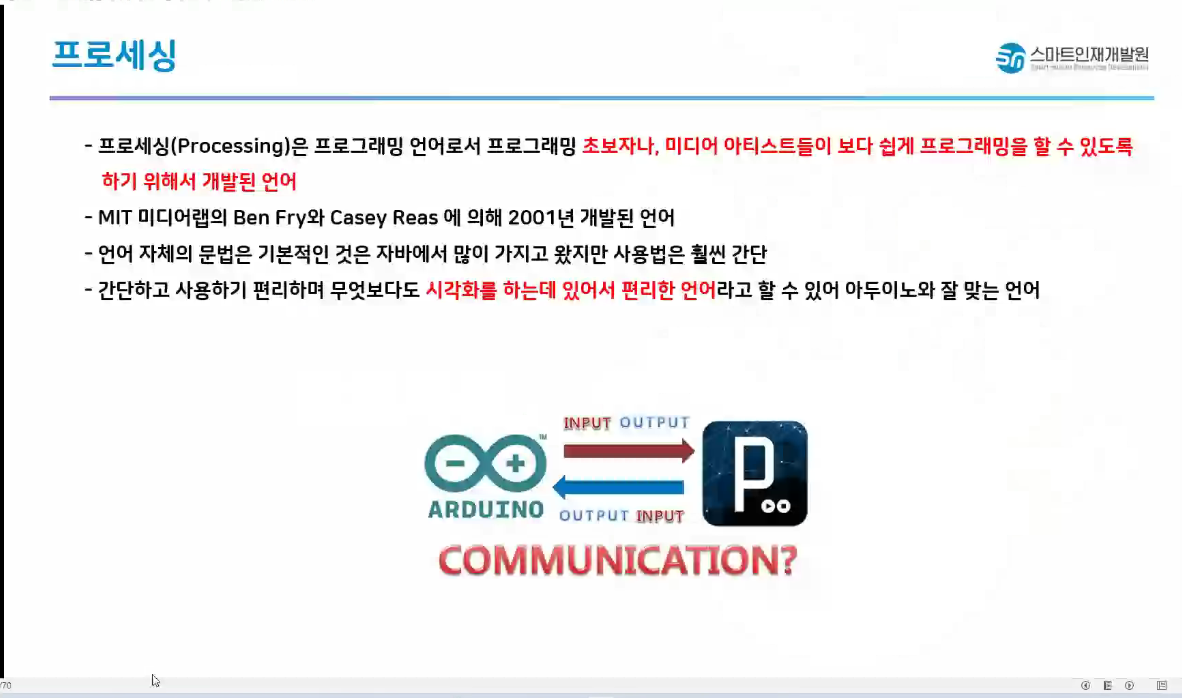

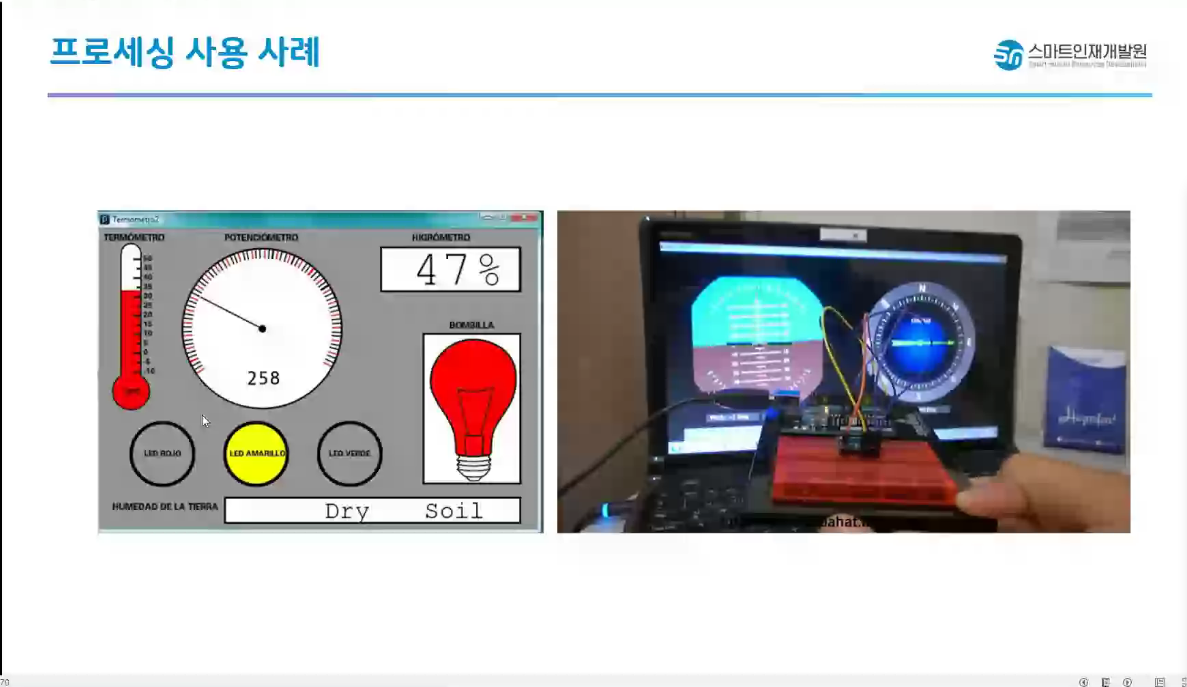

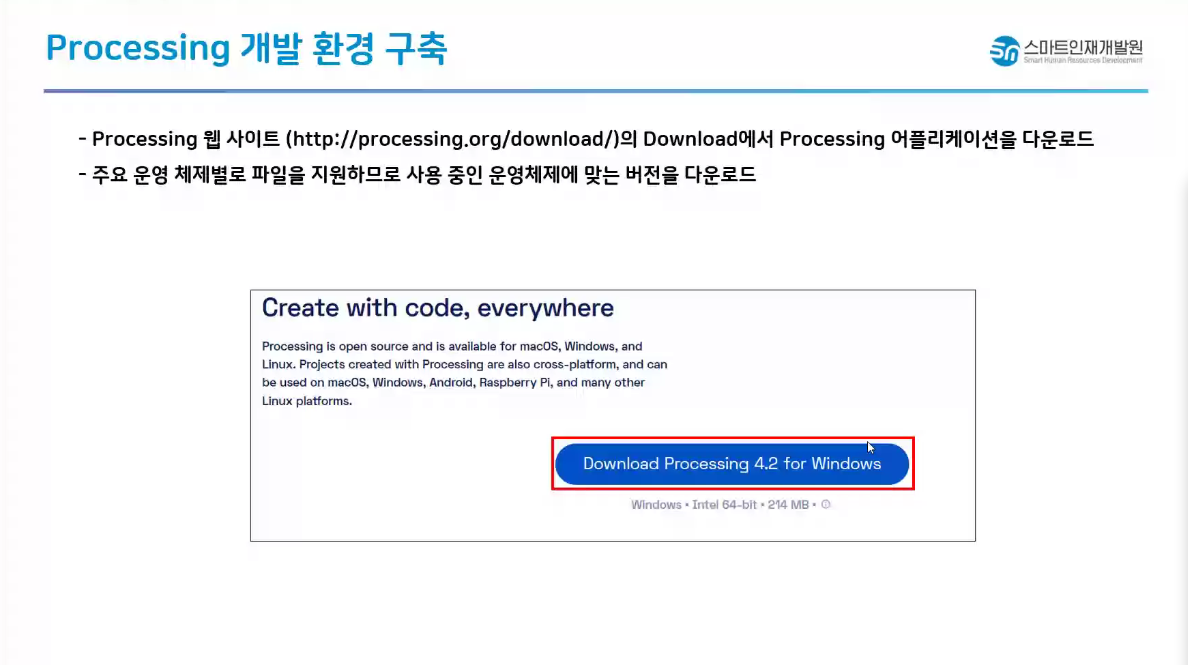

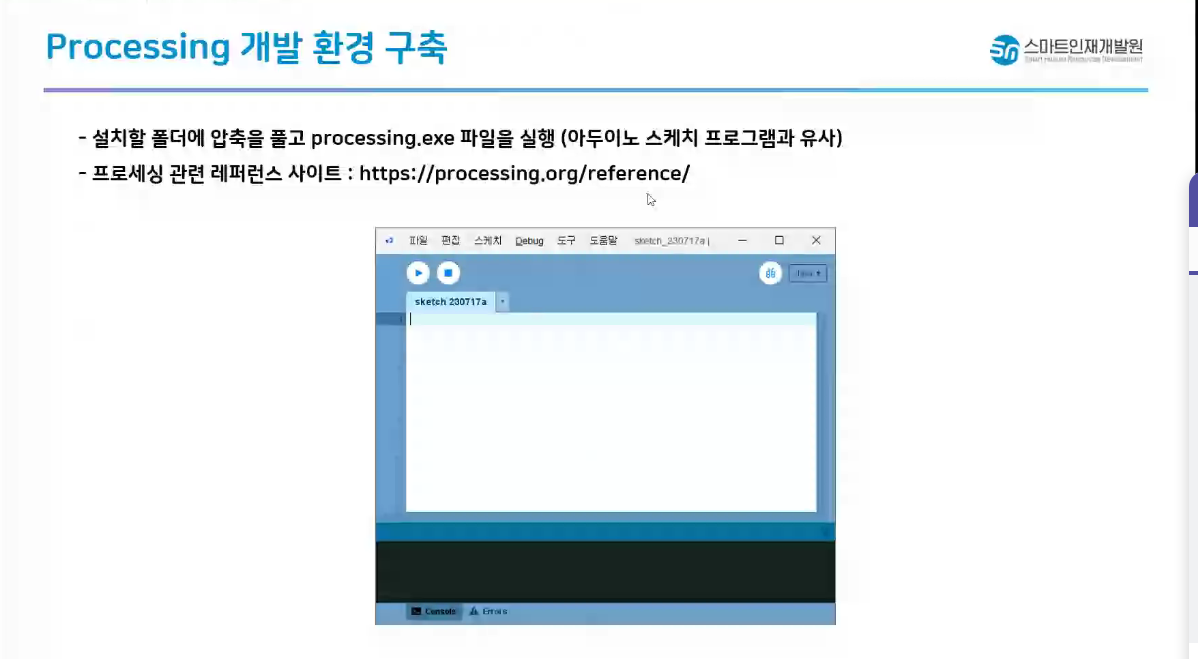

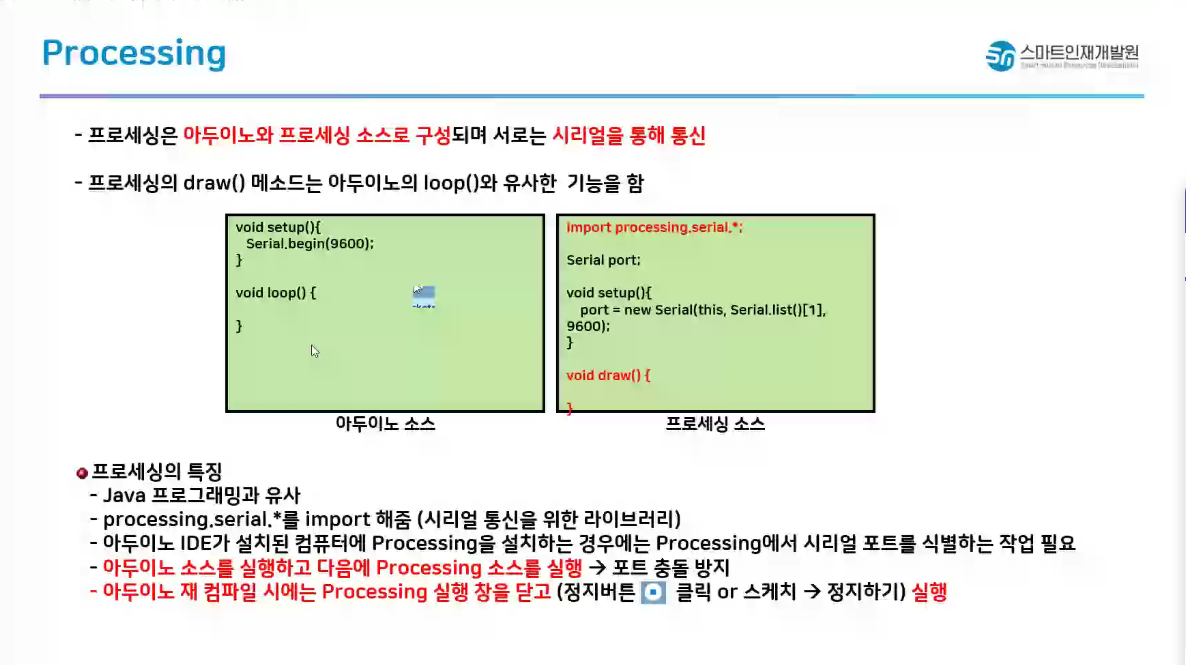

In [ ]:
프로세싱의 목적: 시각화 하는게 목적 그래서 ioop대신에 draw사용 
    프로세스랑 아두이노와 같이 ㅍ시리얼 포트 사용
    아두이노 소스 실행하고 프로세싱 실행 포트 충돌 방지 
    새창이 하나 뜨는데 아두이노를 재컴파일 할려면 프로세싱 창을 닫고 다시 컴파일 하고 다시 프로세싱 실행
    가능하면 정지 버튼 눌러서 사용
    

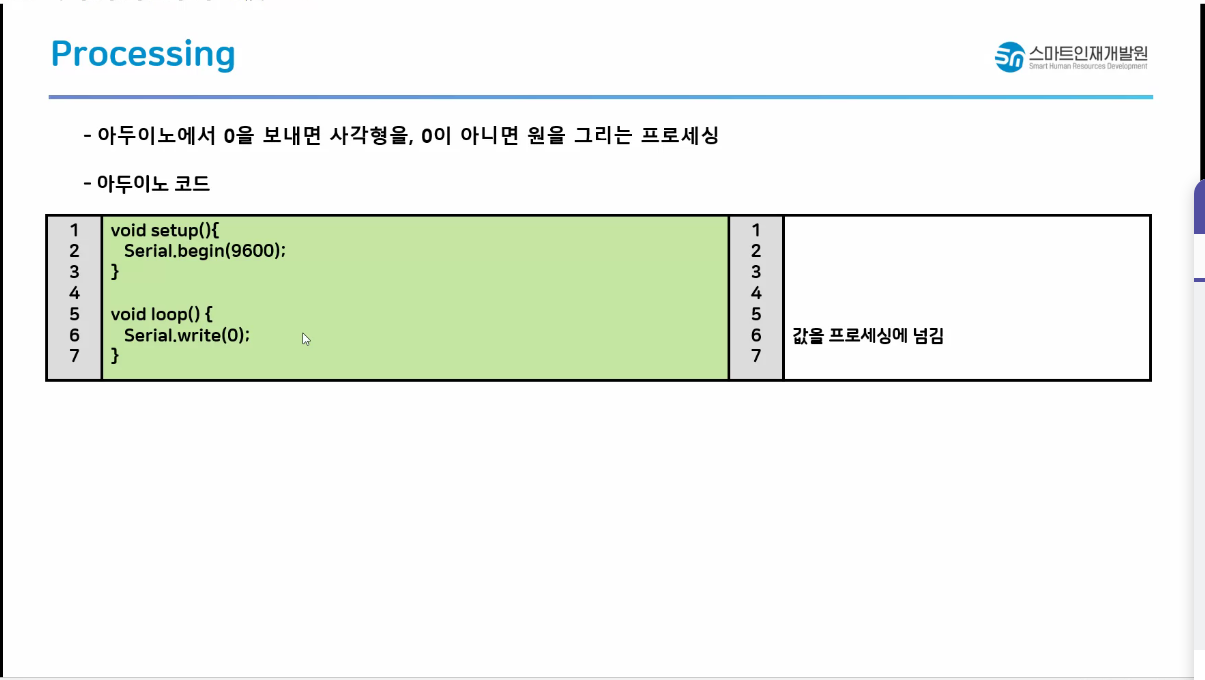

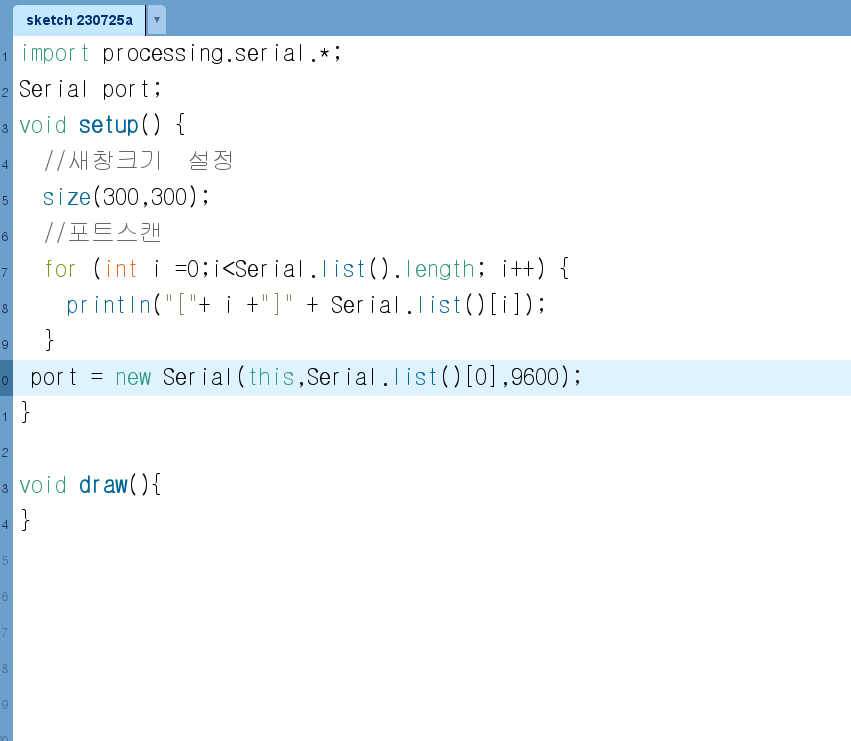

In [ ]:
#프로세싱

import processing.serial.*;
Serial port;
void setup() {
  //새창크기  설정
  size(300,300);
  //포트스캔
  for (int i =0;i<Serial.list().length; i++) {
    println("["+ i +"]" + Serial.list()[i]);
  }
 port = new Serial(this,Serial.list()[0],9600); 
} 

void draw(){
  println("mouseX = "+mouseX);
  //배경색 설정
  background(mouseX); //0~255
  port.write(mouseX); //현재 마우스의 x좌표를 아두이노로 전송

In [ ]:
#아두이노 콛,

void setup() {
  // put your setup code here, to run once:
  Serial.begin(9600);
  pinMode(8,OUTPUT);

}

void loop() {
  // 프로세싱으로 값을 전달
  if (Serial.available()) {
    int val = Serial.read();
    if (val>128){
      digitalWrite(8,HIGH);
      }else {digitalWrite(8,LOW);
      }
    }

}

In [ ]:
import processing.serial.*;
Serial port;
void setup() {
  //새창크기  설정
  size(300,300);
  //포트스캔
  for (int i =0;i<Serial.list().length; i++) {
    println("["+ i +"]" + Serial.list()[i]);
  }
 port = new Serial(this,Serial.list()[0],9600); 
} 

void draw(){
  //0을 받으면 원을 1을 받으면 사각형을 그린다
  //배경색 설정
  background(150); //0~255
  if (port.available() >0){
    int x = port.read();
    
    if (x == 0){
      //중심점, 가로/세로 반지름
      ellipse(40, 40, 60, 60);
    } else if(x==1) {
      //시작점, 가로,세로, 크기
      rect(100,100, 50, 50);
    }